In [7]:
!pip install mglearn

     |████████████████████████████████| 542kB 3.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=27d23b861ff31cb96161a5d018b4e97611642c181ff99a4dd2a87ad44a50e611
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [8]:
from sklearn.neighbors import KNeighborsRegressor
from mglearn.datasets import make_wave
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import mglearn.plots as plots
import matplotlib.pyplot as plt

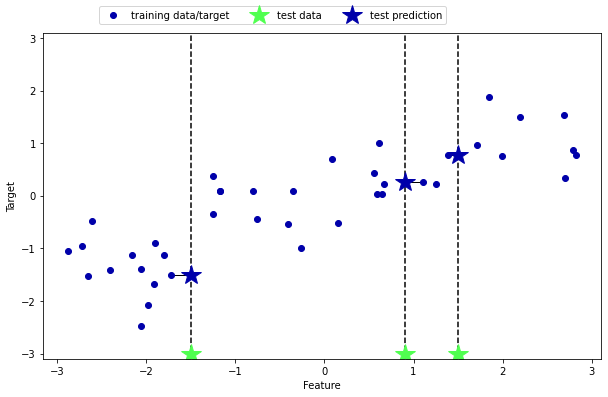

In [9]:
plots.plot_knn_regression(n_neighbors=1)

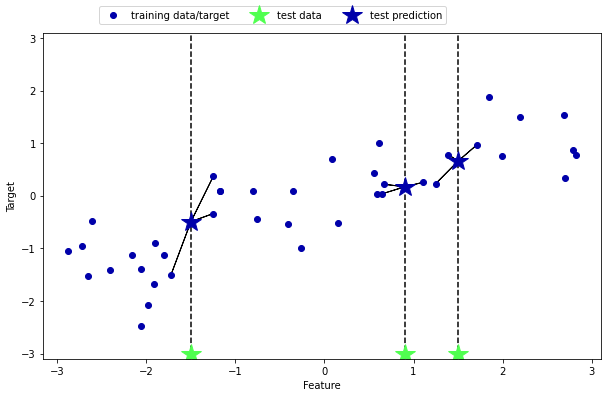

In [10]:
plots.plot_knn_regression(n_neighbors=3)

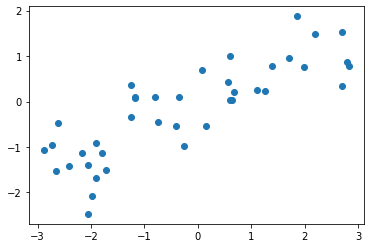

In [11]:
#subject6
X, Y = make_wave(n_samples=40) 
plt.scatter(X, Y)
plt.show()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
knnr = KNeighborsRegressor(n_neighbors=1)
knnr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

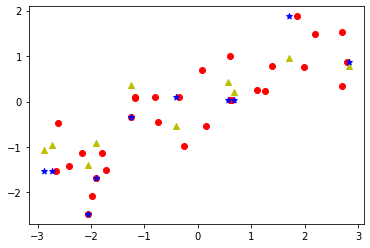

In [13]:
predicted_Y = knnr.predict(X_test)
plt.scatter(X_train, Y_train, c='r', marker='o')
plt.scatter(X_test, Y_test, c='y', marker='^')
plt.scatter(X_test, predicted_Y, c="b", marker="*")

In [14]:
print(f"train accuracy: {knnr.score(X_train, Y_train)}")
print(f"test accuracy: {knnr.score(X_test, Y_test)}")

train accuracy: 1.0
test accuracy: 0.3519867415115093


In [15]:
cv = KFold(n_splits=3, shuffle=True, random_state=0)
param = {
    "n_neighbors": list(range(1, 11, 1))
}

gridcv = GridSearchCV(knnr, param_grid=param, n_jobs=-1, cv=cv)
gridcv.fit(X_train, Y_train)
print(f"score: {gridcv.best_params_}")

score: {'n_neighbors': 3}


In [16]:
knnr = KNeighborsRegressor(**gridcv.best_params_)
knnr.fit(X_train, Y_train)
print(f"optimized train accuracy:{knnr.score(X_train, Y_train)}")
print(f"optimized test accuracy:{knnr.score(X_test, Y_test)}")

optimized train accuracy:0.8194343929538755
optimized test accuracy:0.8344172446249604


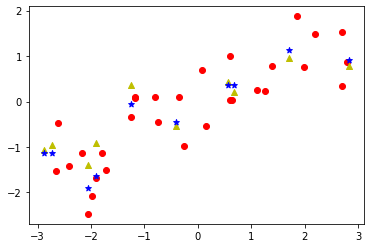

In [17]:
predicted_Y = knnr.predict(X_test)
plt.scatter(X_train, Y_train, c='r', marker='o')
plt.scatter(X_test, Y_test, c='y', marker='^')
plt.scatter(X_test, predicted_Y, c="b", marker="*")

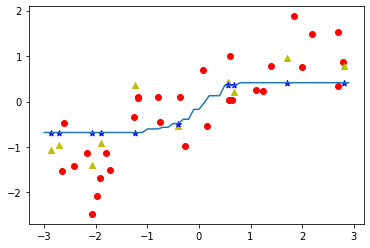

In [25]:
knnr = KNeighborsRegressor(n_neighbors=)
knnr.fit(X_train, Y_train)
t_x = [[i/10] for i in range(-30, 30, 1)]
t_y = knnr.predict(t_x) 
predicted_Y = knnr.predict(X_test)
plt.scatter(X_train, Y_train, c='r', marker='o')
plt.scatter(X_test, Y_test, c='y', marker='^')
plt.scatter(X_test, predicted_Y, c="b", marker="*")
plt.plot(t_x, t_y)